# Model 010 basicHy

Charlie Shobe

This model has ErosionDeposition river erosion and linear diffusion of the forms:
$$\frac{d\eta}{dt}=-E-D$$
and
$$\frac{d\eta}{dt} = -D\nabla^2\eta$$

So, at steady state, the landscape will obey:
$$S=\left(\frac{UV}{K_sA^mr}+\frac{U}{K_sA^m}\right)^{1/n}$$
when only the fluvial rule is in place ($D=0$). 

In [1]:
from terrainbento import BasicHy
import numpy as np
import matplotlib.pyplot as plt
from landlab import imshow_grid

//anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
#parameter dictionary (diffusivity will be 0, K_sp is nonzero)
params = { 'number_of_node_rows' : 100,
          'number_of_node_columns' : 160,
          'node_spacing' : 10.0,
          'east_boundary_closed' : False,
          'north_boundary_closed' : False,
          'west_boundary_closed' : False,
          'south_boundary_closed' : False,
          'dt' : 10.0,
          'K_sp' : 0.001,
          'm_sp' : 0.5,
          'n_sp' : 1.0,
          'v_sc' : 1.0,
          'phi' : 0.0,
          'F_f' : 0.0,
          'linear_diffusivity' : 10e-20,
          'outlet_lowering_rate' : 0.0005,
          'method' : 'simple_stream_power',
          'solver' : 'basic',
          'output_filename': 'model_000_output'
}

In [3]:
#instantiate and establish topo error tolerance
hy = BasicHy(params=params)
tolerance = 0.0001

In [4]:
#time loop
dt = 10
elapsed_time = 0 #years
keep_running = True
while keep_running == True:
    pre_topo = hy.grid.at_node['topographic__elevation'][hy.grid.core_nodes]
    hy.run_one_step(dt)
    #    ld.run_one_step(dt = dt)
    #basic.grid.at_node['topographic__elevation'][basic.grid.boundary_nodes] -= uplift_rate * dt
    post_topo = hy.grid.at_node['topographic__elevation'][hy.grid.core_nodes]
    if elapsed_time % 1000 == 0:
        print(elapsed_time)
        print(max(abs(pre_topo - post_topo)))
    elapsed_time += dt
    if max(abs(pre_topo - post_topo)) <= tolerance: #1mm
        keep_running = False

0
0.182473243352
1000
0.0168176751342
2000
0.0168057358504
3000
0.00810688673071
4000
0.0228733305514
5000
0.0101287333908
6000
0.00765912924056
7000
0.00684648076324
8000
0.0171987087179
9000
0.0208945851739
10000
0.00755481150251
11000
0.0174034737589
12000
0.00945285331323
13000
0.00739652806224
14000
0.0127032114904
15000
0.00980098907807
16000
0.0266642205513
17000
0.00729542425888
18000
0.00666601080359
19000
0.0118555188594
20000
0.00997786839251
21000
0.0260738495045
22000
0.00858988984105
23000
0.0114450104301
24000
0.0131509195322
25000
0.00787366966946
26000
0.009666179024
27000
0.0126673942952
28000
0.00866569821893
29000
0.0153917832909
30000
0.00970850332436
31000
0.0122217191247
32000
0.00802950774027
33000
0.00797696014214
34000
0.0083077704893
35000
0.00579726013188
36000
0.00786555944744
37000
0.00906550410695
38000
0.010186958527
39000
0.0149119252306
40000
0.0151521822817
41000
0.0401863678152
42000
0.0161788602989
43000
0.0114640341439
44000
0.0107848713683
45000
0

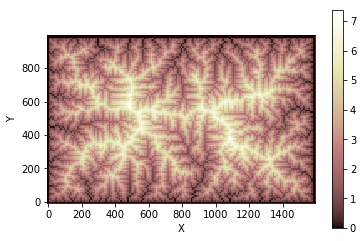

In [5]:
%matplotlib inline
imshow_grid(hy.grid, 'topographic__elevation')

0.001


(0.0001, 0.005)

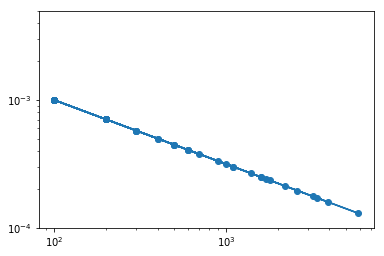

In [14]:
print(hy.grid.at_node['topographic__steepest_slope'][235])
#for some reason, the line of nodes adjacent to all the boundaries
plt.scatter(hy.grid.at_node['drainage_area'][(hy.grid.node_x > 1)&(hy.grid.node_x < 158)&(hy.grid.node_y >1)&(hy.grid.node_y<98)], hy.grid.at_node['topographic__steepest_slope'][(hy.grid.node_x > 1)&(hy.grid.node_x < 158)&(hy.grid.node_y >1)&(hy.grid.node_y<98)])
plt.plot(hy.grid.at_node['drainage_area'][(hy.grid.node_x > 1)&(hy.grid.node_x < 158)&(hy.grid.node_y >1)&(hy.grid.node_y<98)], ( 2 * 0.00005 / 0.01)*np.power(hy.grid.at_node['drainage_area'][(hy.grid.node_x > 1)&(hy.grid.node_x < 158)&(hy.grid.node_y >1)&(hy.grid.node_y<98)], -0.5))
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001, 0.005)

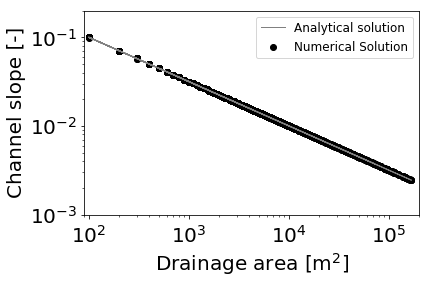

In [15]:
###MAKE SLOPE-AREA PLOT

import matplotlib

#assign area_array and slope_array
area_array = hy.grid.at_node['drainage_area'][(hy.grid.node_x > 10)&(hy.grid.node_x < 1580)&(hy.grid.node_y >10)&(hy.grid.node_y<980)]
slope_array = hy.grid.at_node['topographic__steepest_slope'][(hy.grid.node_x > 10)&(hy.grid.node_x < 1580)&(hy.grid.node_y >10)&(hy.grid.node_y<980)]

##instantiate figure and plot
fig = plt.figure(figsize=(6, 3.75))
slope_area = plt.subplot()

#plotting param
matplotlib.rcParams.update({'font.size': 20})

#create an array for the detachment-limited analytical solution
u = 0.0005 #m/yr, uplift or baselevel lowering rate
k = 0.001 #fluvial erodibility
m = 0.5 #discharge exponent
n = 1.0 #slope exponent
v = 1 #settling velocity

#calculate analytical slope from area field
analytical_slope_array =  np.power(((u * v) / k) + (u / k), 1 / n) * np.power(area_array, -m/n)

#plot the analytical solution
slope_area.plot(area_array, analytical_slope_array, linestyle='-',
                color='grey', linewidth = 1, label = 'Analytical solution')

#plot the data
slope_area.scatter(area_array, slope_array, marker='o', c='k', 
                   label = 'Numerical Solution') #plot HA data
                   
#make axes log and set limits
slope_area.set_xscale('log')
slope_area.set_yscale('log')

slope_area.set_xlim(9*10**1, 2*10**5)
slope_area.set_ylim(1e-3, 2e-1)

#set x and y labels
slope_area.set_xlabel(r'Drainage area [m$^2$]')
slope_area.set_ylabel('Channel slope [-]')
slope_area.legend(scatterpoints=1,prop={'size':12})
slope_area.tick_params(axis='x', which='major', pad=7)

fig.savefig('hybrid_slope_area.eps',bbox_inches='tight', dpi=1000) #save figure

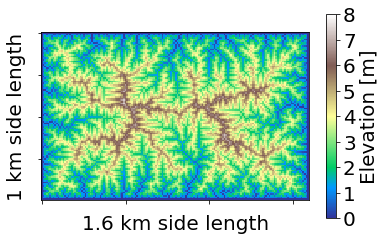

In [12]:
##MAKE TOPO FIGURE
#define 'topo'
topo = hy.grid.at_node['topographic__elevation']
#plotting param
matplotlib.rcParams.update({'font.size': 20})

# #instantiate figure and plot
topo_fig = plt.figure(figsize=(6, 3.75))
t1 = plt.subplot()
topo = topo.reshape(100,160)
ts1_plot = t1.imshow(topo[::-1], cmap='terrain', vmin = 0, vmax = 8)

#add colorbar
cb = plt.colorbar(ts1_plot, label = 'Elevation [m]')

#axis labels
t1.tick_params(labelbottom='off', labelleft='off') 
t1.set_ylabel('1 km side length', labelpad = 15)
t1.set_xlabel('1.6 km side length', labelpad = 15)

#save figure
topo_fig.savefig('hybrid_topo.eps',bbox_inches='tight', dpi=300)